In [10]:
### Preamble ###
## Preamble ###
## Hack code to calculate out snow depth gradients over non ice surfaces
## Code for CBT technical report (snow chapter)
## Requires use of co-registered DEMs and an ice mask
## Brian Menounos 6 April, 2019

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## enable zooming of plots in this notebook
#import mpld3
#mpld3.enable_notebook()
#from mpld3 import plugins

## enable latex symbols in graphs
plt.rcParams['text.latex.preamble']=[r"\usepackage{wasysym}"]

glacier = 'illecillewaet'

path = '/media/pelto/serac_backup/Lidar_DEMs/bare_earth_BC_hydro/' + glacier + '/'
path_out = path

## this will be done for many sites to make a function call to extract
## data of interest 
## uses panda  
def make_snow_gradients(path, path_out, be_dem, snow_dem, msk, n_min):
    # open GeoTIFF as array
    be_dem   = gdal.Open(path + be_dem).ReadAsArray()
    snow_dem = gdal.Open(path + snow_dem).ReadAsArray()
    msk      = gdal.Open(path + msk).ReadAsArray() * 1.0
    
    be_dem[be_dem < 1.0] = np.nan
    
    msk[msk == 0.0] = np.nan
    msk[msk == 1.0] = 2.0

    print(np.shape(be_dem))
    print(np.shape(snow_dem))

    dh = (msk - 1.0) *(snow_dem - be_dem)

    dh[np.abs(dh) > 15] = np.nan
    dh[dh < 0] = np.nan
 
    #dh[c2018 < 1800] = np.nan
    
    plt.imshow(dh)
    plt.colorbar()
    plt.show()
 
    print('Average elevation change:', np.nanmean(dh), 'm')


    # convert 2-d elevation and SWE arrays to 1-D vectors using ravel function
    Zvec = np.ravel(be_dem)
    Depthvec = np.ravel(dh)

    bins = range(1400,3700,100)

    # create pandas dataframe for elevation and SWE
    df = pd.DataFrame({"Z":Zvec,"Depth":Depthvec})

    # classify the elevation data into 100 metre bins and add to the data frame 
    df['Zbins'] = pd.cut(df['Z'], bins, labels= np.arange(1450, 3650, 100))
    
    ## get some statistics from the data
    ## this will be series which can be a pain to work with 
    ## so convert to dataframes
    median = df.groupby(by='Zbins')['Depth'].median()
    iqr    = df.groupby(by='Zbins')['Depth'].quantile(0.75) - df.groupby(by='Zbins')['Depth'].quantile(0.25)
    count  = df.groupby(by='Zbins')['Depth'].count()

    ## remove any values that are less than 100 values
    ## these are series not pandas dataframes
    
    ## convert series to pandas data frames instead of series
    
    median = median.to_frame() 
    iqr    = iqr.to_frame()
    count  = count.to_frame()
    
    ## Make combine data frame
    
    median['iqr']   = iqr
    median['count'] = count
    
    ## remove any rows where count is below set threshold
    median[median['count'] < n_min] = np.nan
    
    median = median.dropna()
    
    ## reset index to make Zbins a column rather than an index
    median          = median.reset_index()
    median['Zbins'] = median['Zbins'].tolist()
    
    ## returns data frame 
    return median 


(1600, 1200)
(1600, 1200)


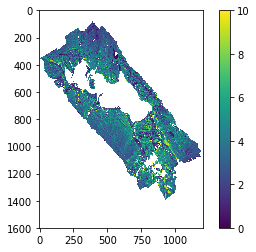

Average elevation change: 3.7822569821625125 m
(1600, 1200)
(1600, 1200)


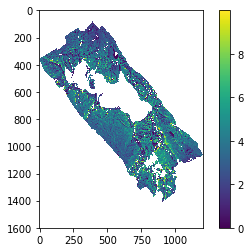

Average elevation change: 3.579669935076885 m
(1600, 1200)
(1600, 1200)


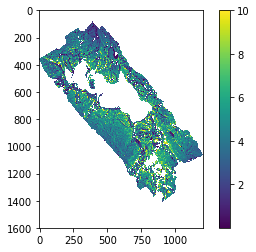

Average elevation change: 4.466228024082695 m
(1600, 1200)
(1600, 1200)


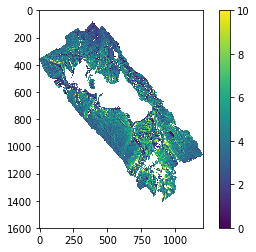

Average elevation change: 4.170559893459127 m


In [74]:
n_min = 2000. 

#kokanee
c_2015 = make_snow_gradients(path, path_out, '150912_kokanee_bedem5.tif', 
                    '150419_kokanee_bedem5_slave.tif',         
                    'kokanee_all_glaciers_2015_5m.tif', n_min)

c_2016 = make_snow_gradients(path, path_out, '150912_kokanee_bedem5.tif', 
                    '160417_kokanee_bedem5_slave.tif', 
                    'kokanee_all_glaciers_2015_5m.tif', n_min)

c_2017 = make_snow_gradients(path, path_out, '150912_kokanee_bedem5.tif', 
                    '170521_kokanee_bedem5_slave.tif',
                    'kokanee_all_glaciers_2015_5m.tif', n_min)

c_2018 = make_snow_gradients(path, path_out, '150912_kokanee_bedem5.tif', 
                    '180426_kokanee_bedem5_slave.tif',
                    'kokanee_all_glaciers_2015_5m.tif', n_min)

(2242, 1922)
(2242, 1922)


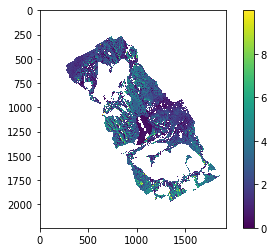

Average elevation change: 2.480180729079604 m
(2242, 1922)
(2242, 1922)


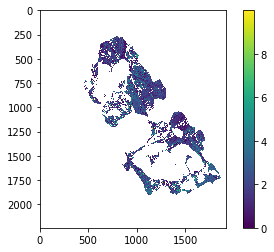

Average elevation change: 2.0490235663224152 m
(2242, 1922)
(2242, 1922)


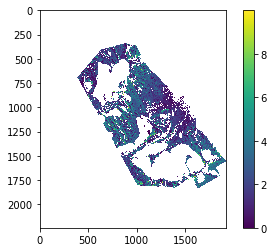

Average elevation change: 2.371445254392033 m
(2242, 1922)
(2242, 1922)


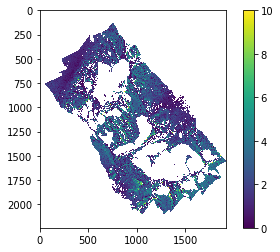

Average elevation change: 2.2623146858919982 m


In [71]:
n_min = 2000. 

c_2015 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif',  
                    '150419_nordic_ppp_bedem5_slave.tif',         
                    'nordic_all_glaciers_msk_2014_5m.tif', n_min)

c_2016 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    '160417_nordic_bedem5_slave.tif', 
                    'nordic_all_glaciers_msk_2014_5m.tif', n_min)

c_2017 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    '170521_Nordic_bedem_clip_und5m_slave.tif',
                    'nordic_all_glaciers_msk_2014_5m.tif', n_min)

c_2018 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    '180426_nordic_bedem5_slave.tif',
                    'nordic_all_glaciers_msk_2014_5m.tif', n_min)

(2242, 1922)
(2242, 1922)


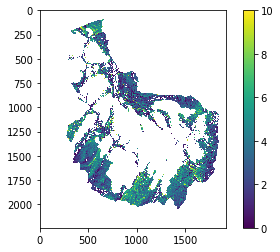

Average elevation change: 3.4476473 m
(2242, 1922)
(2242, 1922)


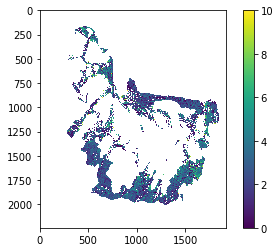

Average elevation change: 2.7735868 m
(2242, 1922)
(2242, 1922)


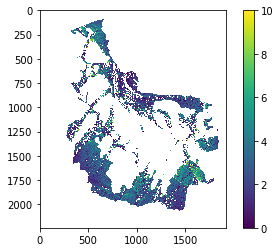

Average elevation change: 2.8949637 m
(2242, 1922)
(2242, 1922)


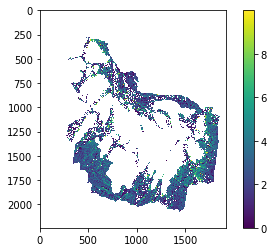

Average elevation change: 2.823852 m


In [78]:
#zillmer
n_min = 2000.

c_2015 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '150419_zillmer_bedem5_slave.tif',         
                    'zillmer_all_glaciers_2014_5m.tif', n_min)

c_2016 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '160418_zillmer_bedem5_slave.tif', 
                    'zillmer_all_glaciers_2014_5m.tif', n_min)

c_2017 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '170521_zillmer_bedem5_slave.tif',
                    'zillmer_all_glaciers_2014_5m.tif', n_min)

c_2018 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '180429_zillmer_bedem5_slave.tif',
                    'zillmer_all_glaciers_2014_5m.tif', n_min)

(3842, 2402)
(3842, 2402)


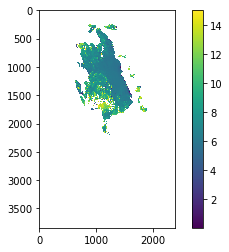

Average elevation change: 7.672137 m
(3842, 2402)
(3842, 2402)


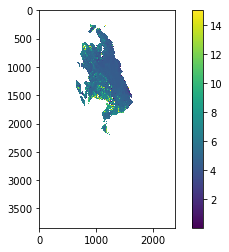

Average elevation change: 5.428695 m
(3842, 2402)
(3842, 2402)


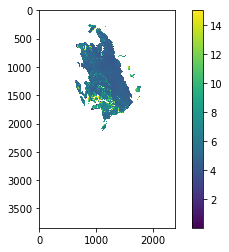

Average elevation change: 5.6290307 m
(3842, 2402)
(3842, 2402)


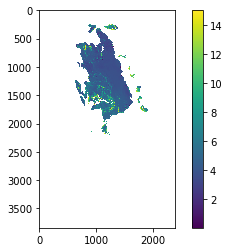

Average elevation change: 4.943276 m


In [11]:
#illecillewaet
n_min = 10.

c_2015 = make_snow_gradients(path, path_out, '170917_illec_bedem5.tif', 
                    '150419_illecillewaet_bedem5_slave.tif',         
                    'illec_all_glaciers_2015_more_5m.tif', n_min)

c_2016 = make_snow_gradients(path, path_out, '170917_illec_bedem5.tif', 
                    '160417_illecillewaet_bedem5_slave.tif', 
                    'illec_all_glaciers_2015_more_5m.tif', n_min)

c_2017 = make_snow_gradients(path, path_out, '170917_illec_bedem5.tif', 
                    '170521_illecillewaet_bedem5_slave.tif',
                    'illec_all_glaciers_2015_more_5m.tif', n_min)

c_2018 = make_snow_gradients(path, path_out, '170917_illec_bedem5.tif', 
                    '180426_Illecillewaet_bedem5_slave.tif',
                    'illec_all_glaciers_2015_more_5m.tif', n_min)

(1000, 1400)
(1000, 1400)


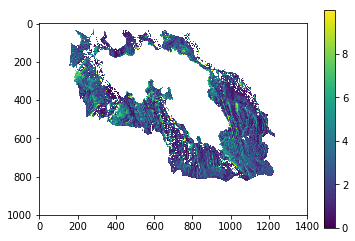

Average elevation change: 2.709717 m
(1000, 1400)
(1000, 1400)


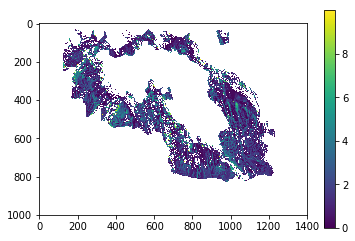

Average elevation change: 1.7887686 m
(1000, 1400)
(1000, 1400)


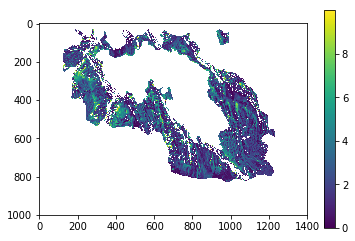

Average elevation change: 2.470147 m
(1000, 1400)
(1000, 1400)


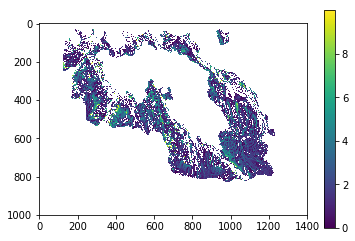

Average elevation change: 2.1045153 m


In [60]:
#haig
n_min = 2000.

c_2015 = make_snow_gradients(path, path_out, '150912_haig_bedem5.tif', 
                    '150420_haig_bedem5_slave.tif',         
                    'haig_all_glaciers_2015.tif', n_min)

c_2016 = make_snow_gradients(path, path_out, '150912_haig_bedem5.tif', 
                    '160417_haig_bedem5_slave.tif', 
                    'haig_all_glaciers_2015.tif', n_min)

c_2017 = make_snow_gradients(path, path_out, '150912_haig_bedem5.tif', 
                    '170521_Haig_bedem5_slave.tif',
                    'haig_all_glaciers_2015.tif', n_min)

c_2018 = make_snow_gradients(path, path_out, '150912_haig_bedem5.tif', 
                    '180427_haig_bedem5_slave.tif',
                    'haig_all_glaciers_2015.tif', n_min)

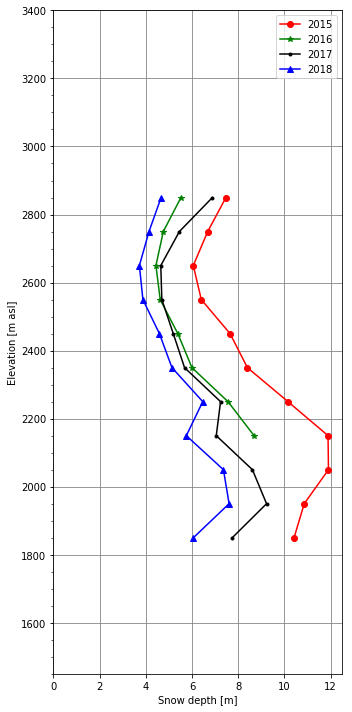

In [13]:

## Code below is a hack. It should be written as a set of functions
## when one has more time (interate over objects and names)

#glacier = 'zillmer'

## write dataframes to output
c_2015.to_csv(path_out + glacier + '_2015.csv')
c_2016.to_csv(path_out + glacier + '_2016.csv')
c_2017.to_csv(path_out + glacier + '_2017.csv')
c_2018.to_csv(path_out + glacier + '_2018.csv')


## make a few plots
## since function 'make_snow_gradients' returns pandas series with indexes 
## we have to extract values noted in calls to objects in plot values
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams['figure.figsize'] = 5, 10

fig, ax = plt.subplots()


ax.plot(c_2015['Depth'], c_2015['Zbins'],'-ro', label='2015')
ax.plot(c_2016['Depth'], c_2016['Zbins'], '-g*', label='2016')
ax.plot(c_2017['Depth'], c_2017['Zbins'], '-k.', label='2017')
ax.plot(c_2018['Depth'], c_2018['Zbins'], '-b^', label='2018')
ax.set_ylabel('Elevation [m asl]')
ax.set_xlabel('Snow depth [m]')

## These limits are scaled to fit all data 
## to keep scaling consistent. These can be cahnged
ax.set_xlim([0, 12.5])
ax.set_ylim([1450, 3400])

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(50))
plt.grid(color='grey')

plt.tight_layout()
plt.legend()
plt.savefig(path_out + glacier + '_snow_gradients_on_ice.pdf', resolution=600)
plt.show()

(2402, 3842)
(2402, 3842)


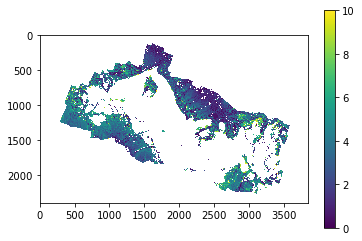

Average elevation change: 3.2862009074084795 m
(2402, 3842)
(2402, 3842)


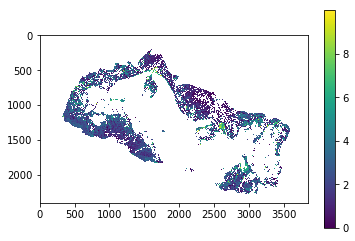

Average elevation change: 2.3456057149806457 m
(2402, 3842)
(2402, 3842)


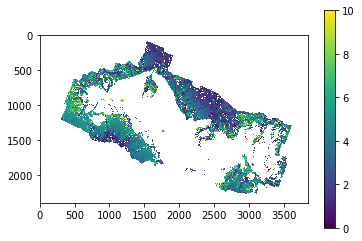

Average elevation change: 3.9554991659013248 m
(2402, 3842)
(2402, 3842)


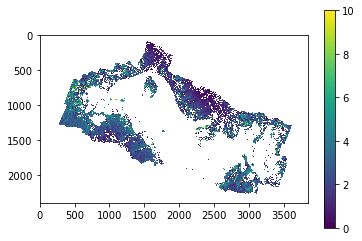

Average elevation change: 2.6355064232469365 m


In [149]:
## Call function to make dataframes for plotting

## this sets the minimum count of a given elevation bin

n_min = 500. 

c_2015 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
                    'conrad_2015_winter_5m.tif', 
                    'conrad_2016_ice_msk_5m.tif', n_min)

c_2016 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
                    'conrad_2016_winter_5m.tif', 
                    'conrad_2016_ice_msk_5m.tif', n_min)

c_2017 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
                    'conrad_2017_winter_5m.tif', 
                    'conrad_2016_ice_msk_5m.tif', n_min)

c_2018 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
                    'conrad_2018_winter_5m.tif', 
                    'conrad_2016_ice_msk_5m.tif', n_min)


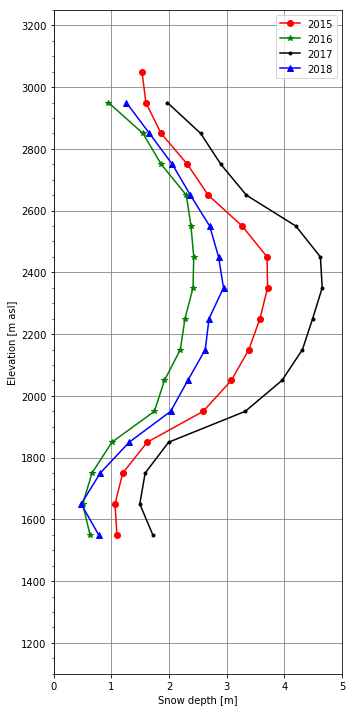

In [151]:

## Code below is a hack. It should be written as a set of functions
## when one has more time (interate over objects and names)

## write dataframes to output
c_2015.to_csv(path_out + 'conrad_2015.csv')
c_2016.to_csv(path_out + 'conrad_2016.csv')
c_2017.to_csv(path_out + 'conrad_2017.csv')
c_2018.to_csv(path_out + 'conrad_2018.csv')


## make a few plots
## since function 'make_snow_gradients' returns pandas series with indexes 
## we have to extract values noted in calls to objects in plot values
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams['figure.figsize'] = 5, 10

fig, ax = plt.subplots()


ax.plot(c_2015['Depth'], c_2015['Zbins'],'-ro', label='2015')
ax.plot(c_2016['Depth'], c_2016['Zbins'], '-g*', label='2016')
ax.plot(c_2017['Depth'], c_2017['Zbins'], '-k.', label='2017')
ax.plot(c_2018['Depth'], c_2018['Zbins'], '-b^', label='2018')
ax.set_ylabel('Elevation [m asl]')
ax.set_xlabel('Snow depth [m]')

## These limits are scaled to fit all data 
## to keep scaling consistent. These can be cahnged
ax.set_xlim([0, 5])
ax.set_ylim([1100, 3250])

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(50))
plt.grid(color='grey')

plt.tight_layout()
plt.legend()
plt.savefig(path_out + 'Conrad_snow_gradients_off_ice.pdf', resolution=600)
plt.show()

In [204]:
## try kokanee
path = '/Volumes/Powermac_backup/lidar_cbt_analysis/kokanee/'
k_2018 = make_snow_gradients(path, path_out, '160913_Kokanee_bedem_5m.tif', 
                    '180426_kokanee_winter_5m.tif', 
                    'kokanee_2016_ice_msk_5m.tif')

(1602, 1442)
(8010, 7210)


ValueError: operands could not be broadcast together with shapes (8010,7210) (1602,1442) 

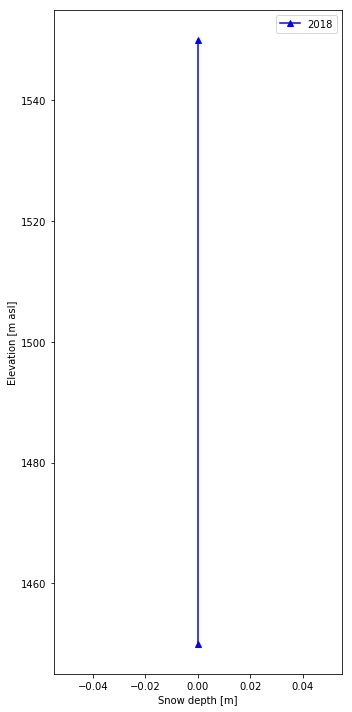

In [205]:
## make a few plots
plt.rcParams['figure.figsize'] = 5, 10
#plt.plot(c_2015.get_values(), c_2015.index.get_values(),'-ro', label='2015')
#plt.plot(c_2016.get_values(), c_2016.index.get_values(), '-g*', label='2016')
#plt.plot(c_2017.get_values(), c_2017.index.get_values(), '-k.', label='2017')
plt.plot(k_2018.get_values(), k_2018.index.get_values(), '-b^', label='2018')
plt.ylabel('Elevation [m asl]')
plt.xlabel('Snow depth [m]')
plt.tight_layout()
plt.legend()
plt.savefig('Kokanee_snow_gradients_off_ice.pdf', resolution=600)
plt.show()